In [26]:
import pandas as pd 
import numpy as np
df=pd.read_csv('/Users/hexiaoyu/Desktop/Courses/INSY- DATA MINING/Utilities.csv')
df

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044
5,Florida,1.32,13.5,111,60.0,-2.2,11127,22.5,1.241
6,Hawaiian,1.22,12.2,175,67.6,2.2,7642,0.0,1.652
7,Idaho,1.10,9.2,245,57.0,3.3,13082,0.0,0.309
8,Kentucky,1.34,13.0,168,60.4,7.2,8406,0.0,0.862
9,Madison,1.12,12.4,197,53.0,2.7,6455,39.2,0.623


In [27]:
df.columns

Index(['Company', 'Fixed_charge', 'RoR', 'Cost', 'Load_factor',
       'Demand_growth', 'Sales', 'Nuclear', 'Fuel_Cost'],
      dtype='object')

In [28]:
df.dtypes

Company           object
Fixed_charge     float64
RoR              float64
Cost               int64
Load_factor      float64
Demand_growth    float64
Sales              int64
Nuclear          float64
Fuel_Cost        float64
dtype: object

In [29]:
X = df[['Sales', 'Fuel_Cost']]


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# same idea with standardize the knn, as the measurement is the distance which would be influenced by scale



## Agglomerative Clustering

In [30]:
# Create two clusters using complete linkage
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, linkage='complete', metric='euclidean')
cluster.fit_predict(X_std)

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [31]:
results=pd.DataFrame(list(zip(df['Company'],np.transpose(cluster.labels_))), columns = ['Company','Cluster label'])
results

,Company,Cluster label
0,Arizona,0
1,Boston,1
2,Central,0
3,Commonwealth,0
4,NY,1
5,Florida,0
6,Hawaiian,1
7,Idaho,0
8,Kentucky,0
9,Madison,0


In [32]:
# count the number of each cluster 
results['Cluster label'].value_counts()

Cluster label
0    15
1     7
Name: count, dtype: int64

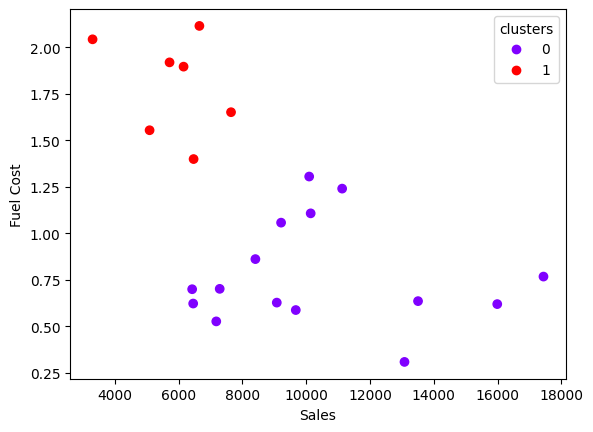

In [33]:
# Plot cluster membership
from matplotlib import pyplot as plt
plot = plt.scatter(df['Sales'], df['Fuel_Cost'], c=cluster.labels_, cmap='rainbow') 
plt.legend(*plot.legend_elements(), title='clusters')
plt.xlabel("Sales")
plt.ylabel("Fuel Cost")
plt.show()

## k-means clustering

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(X_std)
labels = model.predict(X_std)

In [35]:
k_results=pd.DataFrame(list(zip(df['Company'],np.transpose(labels))), columns = ['Company','Cluster label'])
k_results

,Company,Cluster label
0,Arizona,0
1,Boston,1
2,Central,0
3,Commonwealth,0
4,NY,1
5,Florida,0
6,Hawaiian,1
7,Idaho,2
8,Kentucky,0
9,Madison,0


In [36]:
k_results['Cluster label'].value_counts()

Cluster label
0    11
1     7
2     4
Name: count, dtype: int64

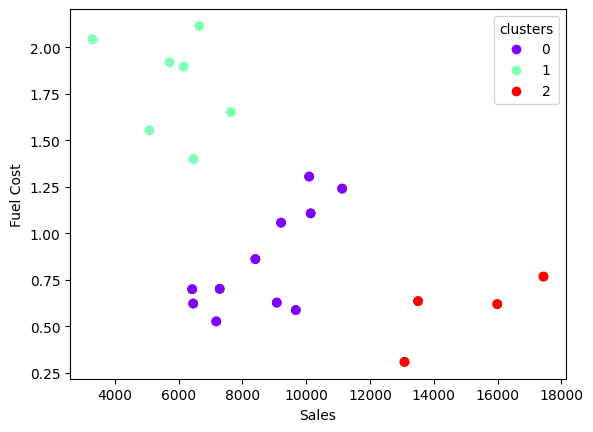

In [37]:
# Plot cluster membership
plt.scatter(df['Sales'], df['Fuel_Cost'], c=labels, cmap='rainbow') 
plot = plt.scatter(df['Sales'], df['Fuel_Cost'], c=labels, cmap='rainbow') 
plt.legend(*plot.legend_elements(), title='clusters')
plt.xlabel("Sales")
plt.ylabel("Fuel Cost")
plt.show()

## cluster performance measurement 
within variance min

between variance max

### elbow method 

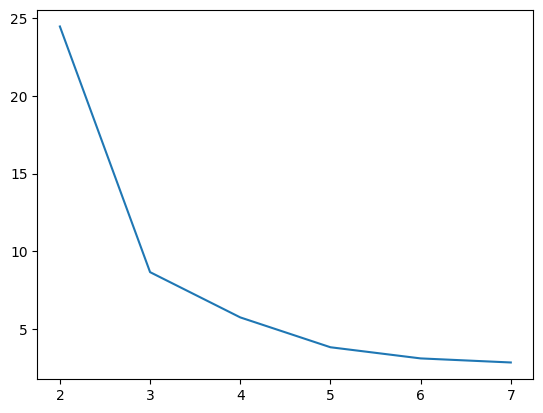

In [38]:
### 1. Find the optimal k for k-means using elbow method, evaluate the within distance
withinss = []
for i in range (2,8):
    kmeans = KMeans(n_clusters=i)
    model = kmeans.fit(X_std)
    withinss.append(model.inertia_)

# Create a plot
from matplotlib import pyplot
pyplot.plot([2,3,4,5,6,7],withinss)

### Silhouette method

In [39]:
### 2. Silhouette method, evaluate the intuitive balance of cohesion (compactness) and separation
# Silhouette analysis when k=3
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(X_std)
labels = model.labels_

from sklearn.metrics import silhouette_samples # examine individual point
silhouette = silhouette_samples(X_std,labels) 
silhouette_df = pd.DataFrame({'label':labels, 'silhouette':silhouette}) # individual observations

In [40]:
silhouette_df

,label,silhouette
0,2,0.565961
1,0,0.546885
2,2,0.547135
3,2,0.575652
4,0,0.603456
5,2,0.330873
6,0,0.474925
7,1,0.393702
8,2,0.647076
9,2,0.589699


In [41]:
# average scores of each cluster 
for i in range(0,3):
    print('Average Silhouette Score for Cluster ',i,': ',np.average(silhouette_df[silhouette_df['label'] == i].silhouette))

Average Silhouette Score for Cluster  0 :  0.5699544765052187
Average Silhouette Score for Cluster  1 :  0.5311945046043701
Average Silhouette Score for Cluster  2 :  0.5247774728476915


In [42]:
 # overall score
from sklearn.metrics import silhouette_score 
silhouette_score(X_std,labels)

np.float64(0.540318707058119)

In [43]:
# Finding optimal K
for i in range (2,8):   
    kmeans= KMeans(n_clusters=i)
    model = kmeans.fit(X_std)
    labels = model.labels_
    print(i,':',silhouette_score(X_std,labels))

2 : 0.29276289238508063
3 : 0.540318707058119
4 : 0.47494044563497745
5 : 0.4935524072825615
6 : 0.4921476320124713
7 : 0.47178104269311283


## Pseudo-F statistics 

In [44]:
### 3. Pseudo-F statistics 
# Pseudo-F Statistic when k=3
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(X_std)
labels = model.labels_

### Type your code here ###
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X_std, labels)

np.float64(38.749380034836385)

In [45]:
for i in range (2,8):
    kmeans = KMeans(n_clusters=i)
    model = kmeans.fit(X_std)
    labels = model.labels_
    print('K=',i,':',calinski_harabasz_score(X_std, labels))

K= 2 : 25.743536110263015
K= 3 : 38.749380034836385
K= 4 : 39.87816604759726
K= 5 : 36.675896587669264
K= 6 : 41.949065102430026
K= 7 : 42.34916044497936


## Examining Clusters

In [51]:
import seaborn as sns
from matplotlib import pyplot
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(X_std)
labels = model.labels_
X['Cluster'] = labels
X

/var/folders/vh/gllcxg8x3yn4st69ndbdsll00000gn/T/ipykernel_51240/1864835963.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = labels


,Sales,Fuel_Cost,Cluster
0,9077,0.628,1
1,5088,1.555,0
2,9212,1.058,1
3,6423,0.700,1
4,3300,2.044,0
5,11127,1.241,1
6,7642,1.652,0
7,13082,0.309,2
8,8406,0.862,1
9,6455,0.623,1


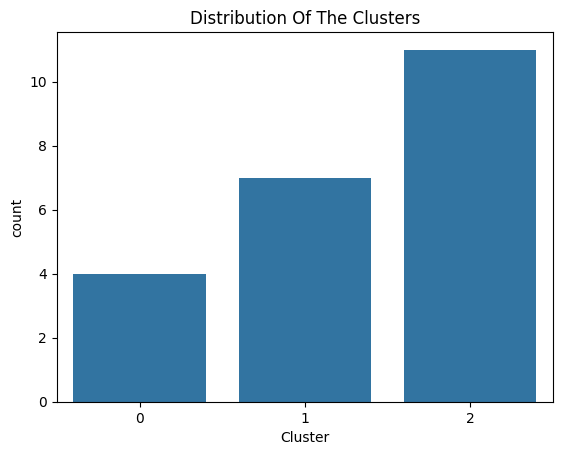

In [47]:
# Distribution of the clusters
pl = sns.countplot(x=X["Cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

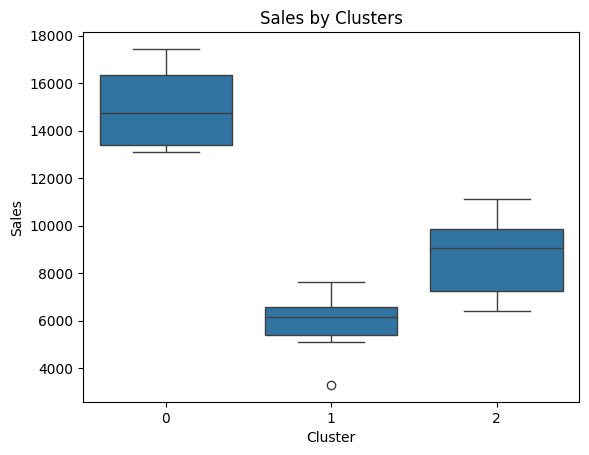

In [48]:
# Sales by clusters
pl = sns.boxplot(x="Cluster", y="Sales", data=X)
pl.set_title("Sales by Clusters")
plt.show()

In [49]:
# Descriptive stats by clusters
pd.set_option('display.expand_frame_repr', False) # to print out full columns
X.groupby("Cluster")['Sales'].describe()
X.groupby("Cluster")['Fuel_Cost'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,4.0,0.583250,0.194490,0.309,0.54225,0.628,0.669,0.768
1,7.0,1.797714,0.266175,1.400,1.60350,1.897,1.982,2.116
2,11.0,0.849364,0.280887,0.527,0.62550,0.702,1.083,1.306


 SO What dose cluster do is to find the hidden pattern of the unlabelled data, meaning help to find the label of each case. then we could get insights from there.

# DBSCAN & K-MEANS

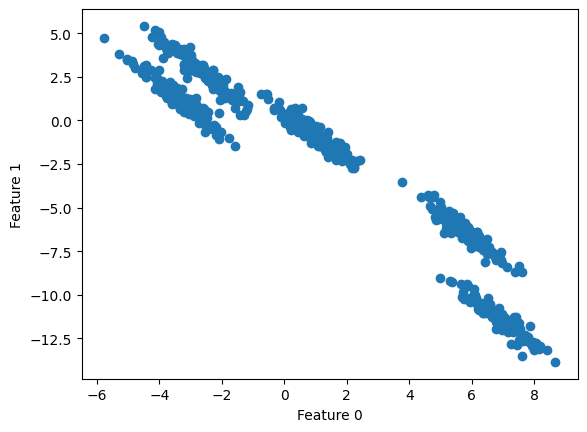

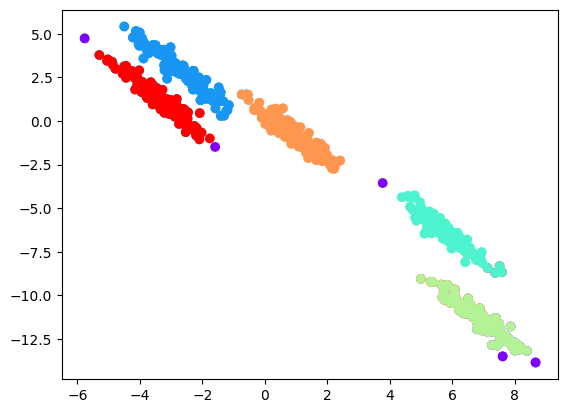

In [54]:
## Before model building

import pandas as pd

df = pd.read_csv("/Users/hexiaoyu/Desktop/Courses/INSY- DATA MINING/ClusterExample.csv")

# Creating a scatterplot
from matplotlib import pyplot

pyplot.scatter(df['x0'], df['x1'])
pyplot.xlabel("Feature 0")
pyplot.ylabel("Feature 1")
pyplot.show()


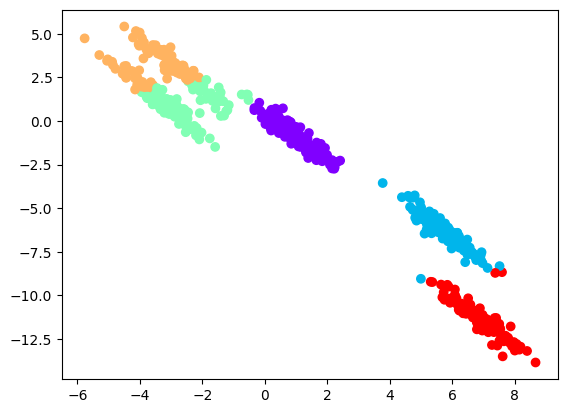

In [55]:
## K-Means vs. DBSCAN

# Building K-Means with K=5 and plotting clusters
### Type your code here ###
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
model = kmeans.fit(df)
labels = model.predict(df)
print(pyplot.scatter(df['x0'], df['x1'], c=labels, cmap='rainbow'))

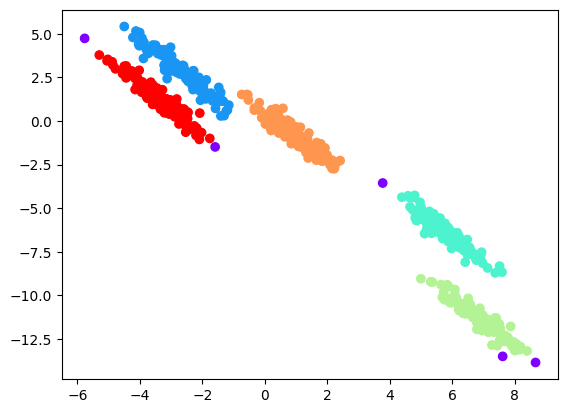

In [56]:


# Running DBSCAN and plotting clusters
### Type your code here ###
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=4)
labels = dbscan.fit_predict(df)
print(pyplot.scatter(df['x0'], df['x1'], c=labels, cmap='rainbow')) 